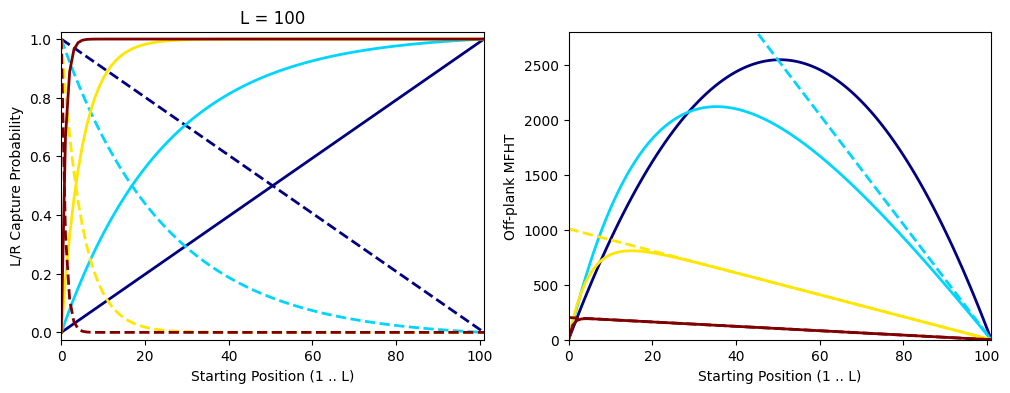

In [2]:
# Tristan Ursell
# Drunken Pirate Markov
# May 2024

import numpy as np
import matplotlib.pyplot as plt

# Length of plank
L = 100

# Probability of rightward step to sample
p_vec = np.array([0.5, 0.51, 0.55, 0.75])
#p_vec=[0.25,0.45,0.49,0.5,0.51,0.55, 0.75];

# Line colormap
cmap1 = plt.get_cmap('jet', len(p_vec))

# Plot y limit
maxMFHT = ((L + 1) / 2) ** 2

# Loop over each value of p
n_vec = np.arange(L + 2)
plt.figure(figsize=(12, 4))

for k, p in enumerate(p_vec):
    q = 1 - p

    # Absorption probabilities
    if p != 0.5:
        pL = (1 - (p / q) ** (L + 1 - n_vec)) / (1 - (p / q) ** (L + 1))
        pR = (1 - (q / p) ** n_vec) / (1 - (q / p) ** (L + 1))
        tau_R = (L + 1 - n_vec) / (2 * p - 1) * pR
        tau_L = n_vec / (2 * p - 1) * pL
        tau_vec = tau_R - tau_L
    else:
        pR = n_vec / (L + 1)
        pL = 1 - pR
        tau_vec = n_vec * (L + 1 - n_vec)
    
    # Asymptotes / upper bounds
    if p < 0.5:
        asymp_MFHT = n_vec / (1 - 2 * p)
    elif p > 0.5:
        asymp_MFHT = (L + 1 - n_vec) / (2 * p - 1)
    
    # Plot capture probabilities
    plt.subplot(1, 2, 1)
    plt.plot(n_vec, pL, '--', linewidth=2, color=cmap1(k))
    plt.plot(n_vec, pR, '-', linewidth=2, color=cmap1(k))
    plt.xlabel('Starting Position (1 .. L)')
    plt.ylabel('L/R Capture Probability')
    plt.xlim([0, L + 1])
    plt.ylim([-0.025, 1.025])
    plt.title(f'L = {L}')
    plt.box(True)
    
    # Plot MFHTs
    plt.subplot(1, 2, 2)
    plt.plot(n_vec, tau_vec, '-', linewidth=2, color=cmap1(k))
    if p != 0.5:
        plt.plot(n_vec, asymp_MFHT, '--', linewidth=2, color=cmap1(k))
    plt.xlabel('Starting Position (1 .. L)')
    plt.ylabel('Off-plank MFHT')
    plt.xlim([0, L + 1])
    plt.ylim([0, round(1.1 * maxMFHT, 2)])
    plt.box(True)

plt.savefig(f'drunken_pirate_capture_prob_and_off-plank_MFHT.svg', format='svg')
plt.show()
